In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('Big_mart.csv')
pd.options.display.max_columns = None
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.size

102276

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df.Item_Weight.head(20)

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.857645
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
15     9.000000
16    11.800000
17     9.000000
18    12.857645
19    13.350000
Name: Item_Weight, dtype: float64

In [8]:
df.Outlet_Size.fillna('Missing',inplace=True)
df.Outlet_Size.head(20)

0      Medium
1      Medium
2      Medium
3     Missing
4        High
5      Medium
6        High
7      Medium
8     Missing
9     Missing
10     Medium
11      Small
12     Medium
13      Small
14       High
15      Small
16     Medium
17     Medium
18     Medium
19      Small
Name: Outlet_Size, dtype: object

In [9]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].head(20)

0     Low Fat
1     Regular
2     Low Fat
3     Regular
4     Low Fat
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Regular
10    Low Fat
11    Regular
12    Regular
13    Regular
14    Low Fat
15    Regular
16    Low Fat
17    Regular
18    Low Fat
19    Low Fat
Name: Item_Fat_Content, dtype: object

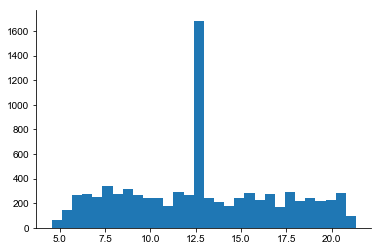

In [10]:
plt.hist(x  = 'Item_Weight',  data=df, bins=30)
sns.set(rc={'figure.figsize':(21.0,8.27)})
sns.despine()

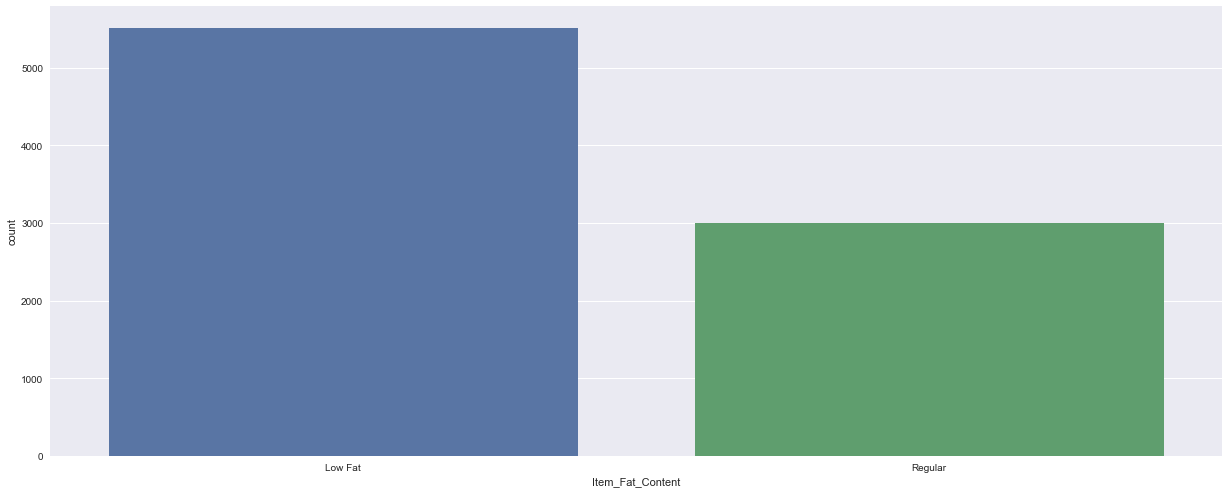

In [11]:
sns.countplot(x  = 'Item_Fat_Content',data=df)
sns.despine()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


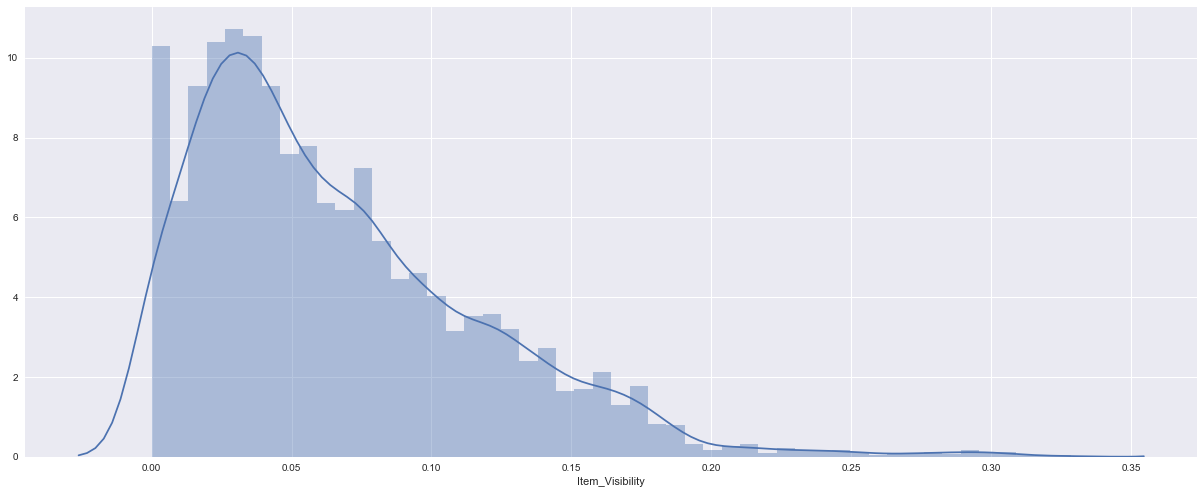

In [12]:
sns.distplot(df['Item_Visibility'])
sns.despine()

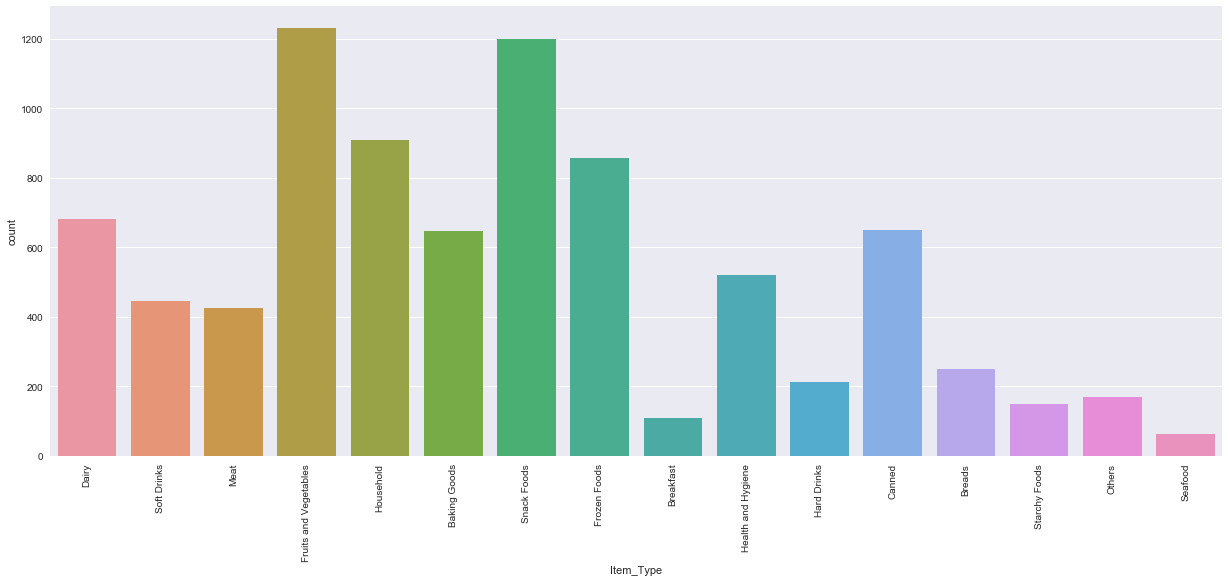

In [13]:
sns.countplot(x  = 'Item_Type',data=df)
N=16
ind=np.arange(N)
s=(df['Item_Type'].unique())
plt.xticks(ind,s,rotation='vertical')
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


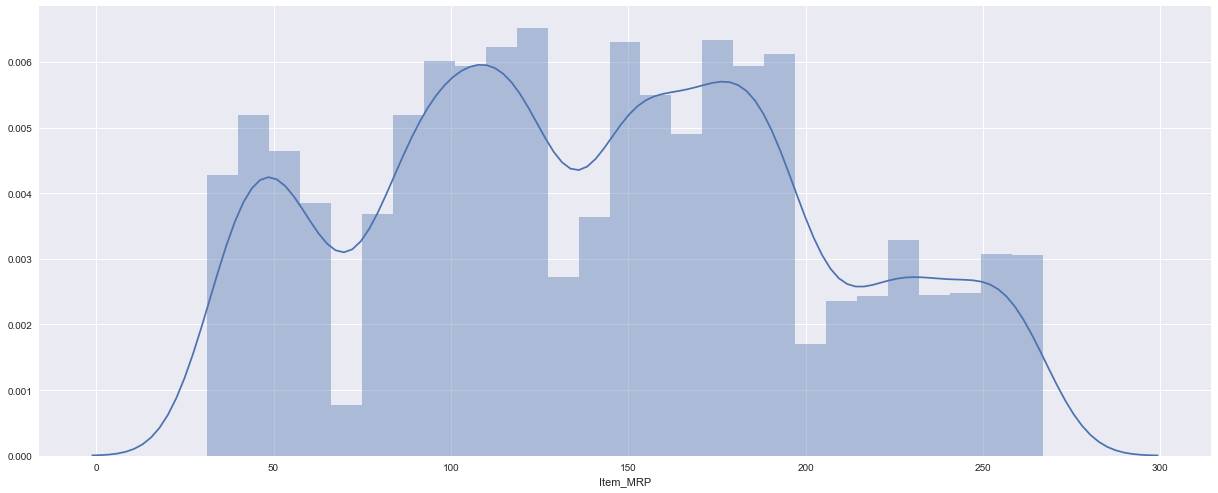

In [14]:
sns.distplot(df['Item_MRP'])
sns.despine()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


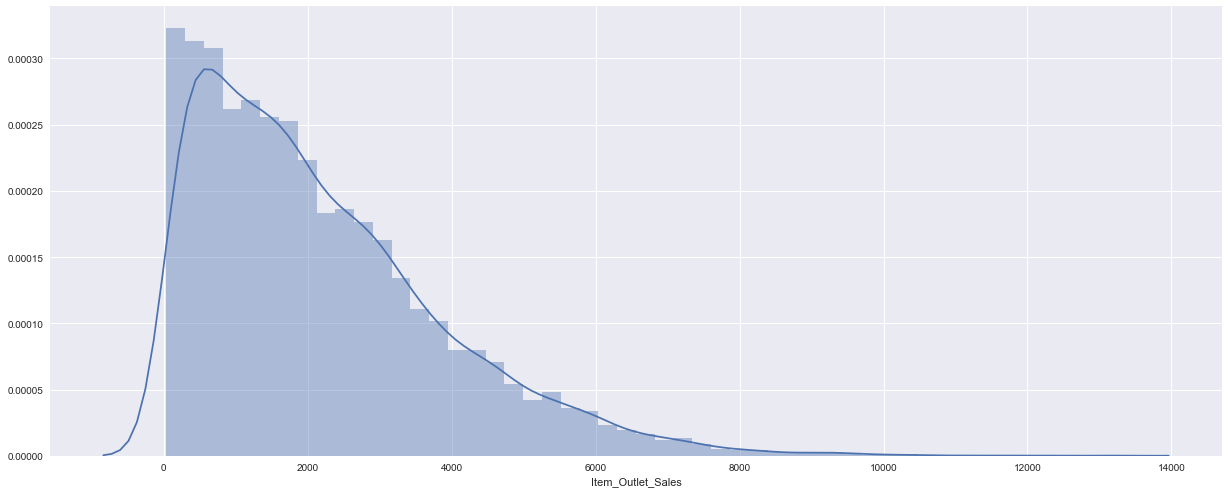

In [15]:
sns.distplot(df['Item_Outlet_Sales'])
sns.despine()

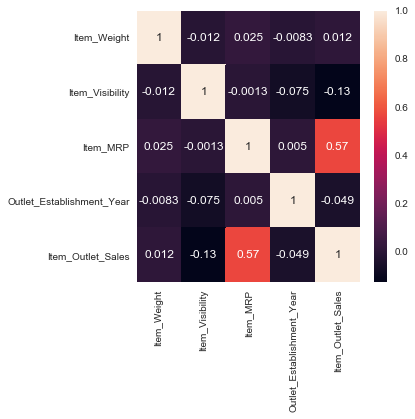

In [16]:
plt.figure(figsize  =(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

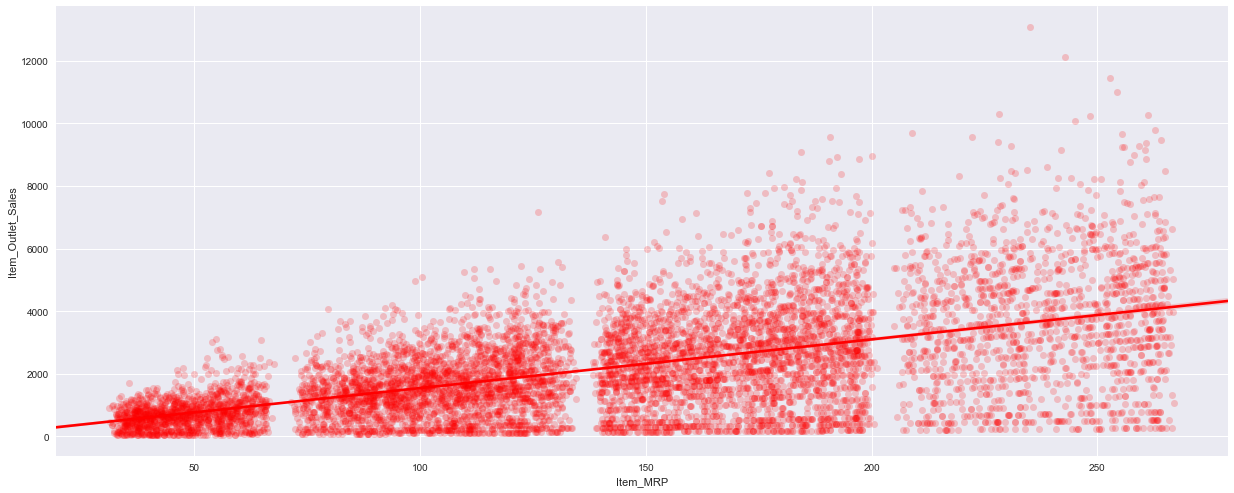

In [17]:
sns.regplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

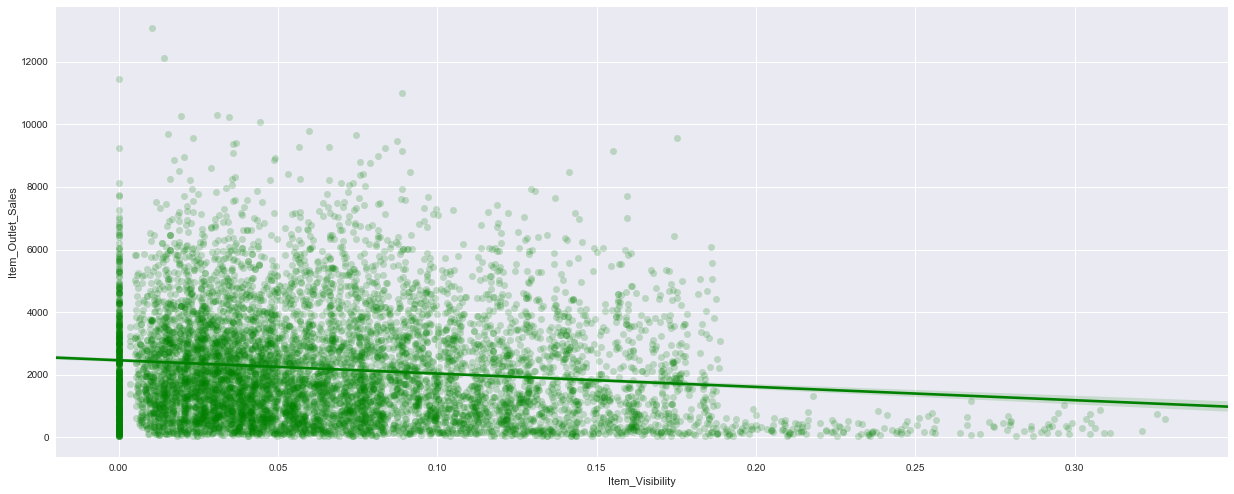

In [18]:
df['Item_Visibility1'] = df['Item_Visibility']*1000;
sns.regplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = df , scatter_kws={'alpha':0.2},color='green')
sns.despine()
a = df.drop('Item_Visibility1',axis=1,inplace=True)

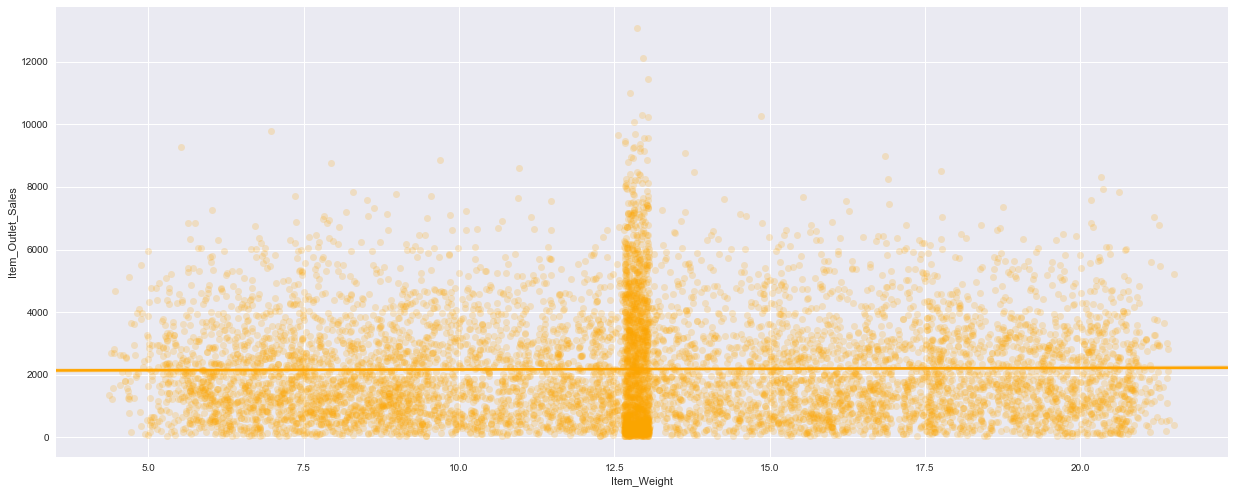

In [19]:
sns.regplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.2},color='orange')
sns.despine()

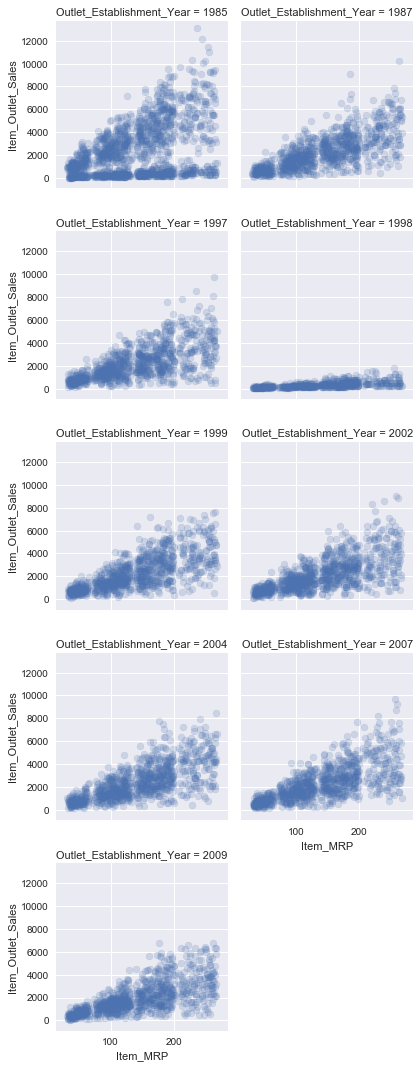

In [20]:
grid = sns.FacetGrid(df, col='Outlet_Establishment_Year',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

In [21]:
New_Item_Fat_Content = [1 if values == 'Regular' else 0 for values in df.Item_Fat_Content ]
df['Item_Fat_Content'] = New_Item_Fat_Content

In [22]:
pd.options.display.max_columns = None
df1 = pd.get_dummies(df, columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df1.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300000,0,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920000,1,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,FDN15,17.500000,0,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200000,1,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.930000,0,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
5,FDP36,10.395000,1,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6,FDO10,13.650000,1,0.012741,57.6588,OUT013,1987,343.5528,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
7,FDP10,12.857645,0,0.127470,107.7622,OUT027,1985,4022.7636,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
8,FDH17,16.200000,1,0.016687,96.9726,OUT045,2002,1076.5986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
9,FDU28,19.200000,1,0.094450,187.8214,OUT017,2007,4710.5350,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [23]:
import itertools
from scipy.stats import pearsonr
correlations = {}
df2 = df1.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
columns = df2.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + ' --- ' + col_b] = pearsonr(df2.loc[:, col_a], df2.loc[:, col_b])

result = df2.from_dict(correlations, orient='index')
result.columns = ['PCC', 'P-Value']
pd.options.display.max_rows = None
print(result.sort_index().head(20))

                                                         PCC        P-Value
Item_Fat_Content --- Item_MRP                       0.006063   5.757179e-01
Item_Fat_Content --- Item_Outlet_Sales              0.018719   8.398917e-02
Item_Fat_Content --- Item_Type_Baking Goods         0.083804   9.237800e-15
Item_Fat_Content --- Item_Type_Breads               0.032643   2.578733e-03
Item_Fat_Content --- Item_Type_Breakfast            0.065711   1.262525e-09
Item_Fat_Content --- Item_Type_Canned               0.073235   1.295649e-11
Item_Fat_Content --- Item_Type_Dairy                0.021236   4.994933e-02
Item_Fat_Content --- Item_Type_Frozen Foods         0.085041   3.718674e-15
Item_Fat_Content --- Item_Type_Fruits and Veget...  0.116955   2.405031e-27
Item_Fat_Content --- Item_Type_Hard Drinks         -0.118461   5.131400e-28
Item_Fat_Content --- Item_Type_Health and Hygiene  -0.188156   9.269944e-69
Item_Fat_Content --- Item_Type_Household           -0.255203  8.269556e-127
Item_Fat_Con

In [24]:
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import *
from sklearn.metrics import *

In [25]:
title = df1['Item_Outlet_Sales']
train = df1.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

In [27]:
x_train , x_test , y_train , y_test = train_test_split(train , title , train_size = 0.82,random_state =42)

In [28]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
reg.score(x_test,y_test)

0.5823007458464053

In [30]:
clf = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(train,title)
results = model_selection.cross_val_score(clf, train, title)
results.mean()

0.5923577474959213

In [31]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.6115583099336152